In [1]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
# import pipvis as vp
from importlib import reload
from salishsea_tools import (
viz_tools)


We partition these data into five seasons: winter (November–February), spring (March to mid-May), freshet
(defined below), summer (mid-May to September), and fall (October–November), consistent with the largescale
wind patterns responsible for upwelling/downwelling (Table S2) [Bylhouwer et al., 2013]. The transition to
downwelling coincides with the first winter storms, which mix down the strong summer surface stratification
in the SoG. Upwelling and downwelling on the outer coast directly influence the properties of the subsurface
inflow in the JdF [M06; Davis et al., 2014]. The freshet “season” occurs within the summer season, in years
when the Fraser outflow is strong enough to produce surface S < 20 at our sampling locations in the S-SoG
(Figure 1; 2011 and 2012 in our data).

#ben's extractor: https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/master_hindcast_extractor.ipynb


## define csog, nsog, and jdf stations - according to year 2015 clustering. plot to visualise

In [2]:
import pickle
tcl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/BIO_clno_5_2015_reass.pkl'
xs_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Xcoords_for571_stations.pkl'
ys_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Ycoords_for571_stations.pkl'

cldes = pickle.load(open(tcl, 'rb'))
xs = pickle.load(open(xs_pkl, 'rb'))
ys = pickle.load(open(ys_pkl, 'rb'))

ys_csog = ys[cldes == 3]
xs_csog = xs[cldes == 3]

ys_nsog = ys[cldes == 4]
xs_nsog = xs[cldes == 4]

ys_jdf = ys[cldes == 5]
xs_jdf = xs[cldes == 5]


/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc


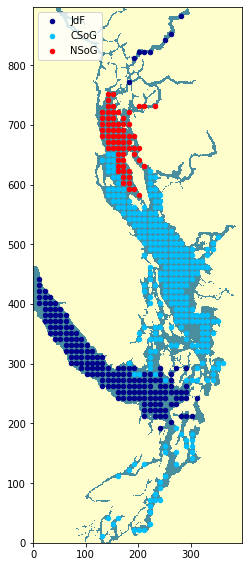

In [3]:
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
print(bath)
grid = nc.Dataset(bath)
fmask = (grid['fmask'][0,0,:,:]) 


fact = 1.4
fig = plt.figure(figsize=(9.1*fact, 7.09*fact))
ax = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
#ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=2, cmap = cm.cm.deep)
pts = ax.scatter(xs_jdf,ys_jdf,\
                 s=20,c='darkblue',marker='o', label = 'JdF')
pts = ax.scatter(xs_csog,ys_csog,\
                 s=20,c='deepskyblue',marker='o', label = 'CSoG')
pts = ax.scatter(xs_nsog,ys_nsog,\
                 s=20,c='red',marker='o', label = 'NSoG')
plt.legend()

In [4]:
#open the layers profiles
#[0,10,18,24,26]

OmA_2017_FY_D_0 = pickle.load(open('./pkls/OmA_2017_FY_D_0.pkl', 'rb'))  
OmA_2017_FY_D_10 = pickle.load(open('./pkls/OmA_2017_FY_D_10.pkl', 'rb'))  
OmA_2017_FY_D_18 = pickle.load(open('./pkls/OmA_2017_FY_D_18.pkl', 'rb'))  
OmA_2017_FY_D_24 = pickle.load(open('./pkls/OmA_2017_FY_D_24.pkl', 'rb'))  
OmA_2017_FY_D_26 = pickle.load(open('./pkls/OmA_2017_FY_D_26.pkl', 'rb'))  




In [5]:
step = 0.05
t_start = 0
t_end = 3
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

1.0
1.0


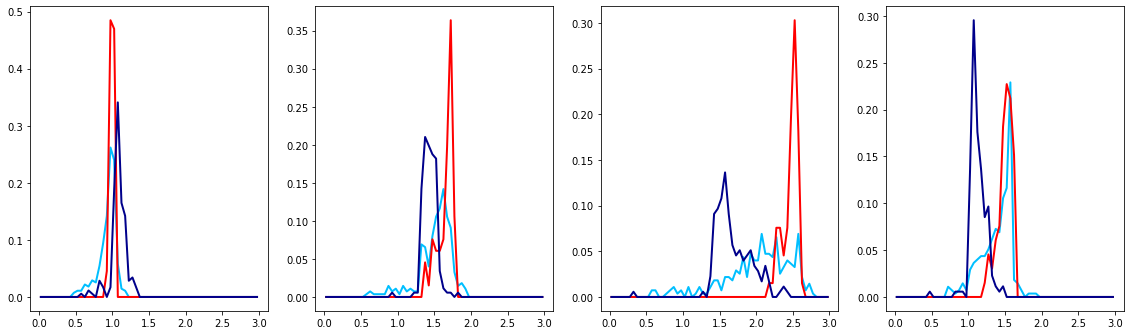

In [6]:
spr_st = 59; spr_e = 151
sum_st = 151; sum_e = 243
aut_st = 243; aut_e = 334
win_st = 334; win_e = 365

fig, axs = plt.subplots(1,4, figsize=(14*fact, 20*fact/5), facecolor='w', edgecolor='k')
axs = axs.ravel()

def plot_hists(OmA_2017_FY_D_TNC,inds):
    
    
    win_Oma_2017_TNC = np.concatenate((OmA_2017_FY_D_TNC[0:59,:,:], OmA_2017_FY_D_TNC[win_st:win_e,:,:]), axis = 0)
    win_mean_Oma_2017_TNC = np.nanmean(win_Oma_2017_TNC, axis = 0)
    spr_Oma_2017_TNC = OmA_2017_FY_D_TNC[spr_st:spr_e,:,:]
    spr_mean_Oma_2017_TNC = np.nanmean(spr_Oma_2017_TNC, axis = 0)
    sum_Oma_2017_TNC = OmA_2017_FY_D_TNC[sum_st:sum_e,:,:]
    sum_mean_Oma_2017_TNC = np.nanmean(sum_Oma_2017_TNC, axis = 0)
    aut_Oma_2017_TNC = OmA_2017_FY_D_TNC[aut_st:aut_e,:,:]
    aut_mean_Oma_2017_TNC = np.nanmean(aut_Oma_2017_TNC, axis = 0)
    
    win_csog = win_mean_Oma_2017_TNC[ys_csog,xs_csog]
    twin_csog = win_csog[win_csog < 1e10]
    hist_win_csog = manual_hist(twin_csog)
    thist_win_csog = np.copy(hist_win_csog)
    
    win_nsog = win_mean_Oma_2017_TNC[ys_nsog,xs_nsog]
    twin_nsog = win_nsog[win_nsog < 1e10]
    hist_win_nsog = manual_hist(twin_nsog)
    thist_win_nsog = np.copy(hist_win_nsog)
    
    win_jdf = win_mean_Oma_2017_TNC[ys_jdf,xs_jdf]
    twin_jdf = win_jdf[win_jdf < 1e10]
    hist_win_jdf = manual_hist(twin_jdf)
    thist_win_jdf = np.copy(hist_win_jdf)
    
    sum_csog = sum_mean_Oma_2017_TNC[ys_csog,xs_csog]
    tsum_csog = sum_csog[sum_csog < 1e10]
    hist_sum_csog = manual_hist(tsum_csog)
    thist_sum_csog = np.copy(hist_sum_csog)
    
    sum_nsog = sum_mean_Oma_2017_TNC[ys_nsog,xs_nsog]
    tsum_nsog = sum_nsog[sum_nsog < 1e10]
    hist_sum_nsog = manual_hist(tsum_nsog)
    thist_sum_nsog = np.copy(hist_sum_nsog)
    
    sum_jdf = sum_mean_Oma_2017_TNC[ys_jdf,xs_jdf]
    tsum_jdf = sum_jdf[sum_jdf < 1e10]
    hist_sum_jdf = manual_hist(tsum_jdf)
    thist_sum_jdf = np.copy(hist_sum_jdf)
    
    spr_csog = spr_mean_Oma_2017_TNC[ys_csog,xs_csog]
    tspr_csog = spr_csog[spr_csog < 1e10]
    hist_spr_csog = manual_hist(tspr_csog)
    thist_spr_csog = np.copy(hist_spr_csog)
    
    spr_nsog = spr_mean_Oma_2017_TNC[ys_nsog,xs_nsog]
    tspr_nsog = spr_nsog[spr_nsog < 1e10]
    hist_spr_nsog = manual_hist(tspr_nsog)
    thist_spr_nsog = np.copy(hist_spr_nsog)
    
    spr_jdf = spr_mean_Oma_2017_TNC[ys_jdf,xs_jdf]
    tspr_jdf = spr_jdf[spr_jdf < 1e10]
    hist_spr_jdf = manual_hist(tspr_jdf)
    thist_spr_jdf = np.copy(hist_spr_jdf)
    
    aut_csog = aut_mean_Oma_2017_TNC[ys_csog,xs_csog]
    taut_csog = aut_csog[aut_csog < 1e10]
    hist_aut_csog = manual_hist(taut_csog)
    thist_aut_csog = np.copy(hist_aut_csog)
    
    aut_nsog = aut_mean_Oma_2017_TNC[ys_nsog,xs_nsog]
    taut_nsog = aut_nsog[aut_nsog < 1e10]
    hist_aut_nsog = manual_hist(taut_nsog)
    thist_aut_nsog = np.copy(hist_aut_nsog)
    
    aut_jdf = aut_mean_Oma_2017_TNC[ys_jdf,xs_jdf]
    taut_jdf = aut_jdf[aut_jdf < 1e10]
    hist_aut_jdf = manual_hist(taut_jdf)
    thist_aut_jdf = np.copy(hist_aut_jdf)

    axs[inds[0]].plot(bin_centres,thist_win_csog, linewidth = 2, color = 'deepskyblue')
    axs[inds[0]].plot(bin_centres,thist_win_nsog, linewidth = 2, color = 'red')
    axs[inds[0]].plot(bin_centres,thist_win_jdf, linewidth = 2, color = 'darkblue')
    
    print(np.sum(thist_win_csog))
    axs[inds[1]].plot(bin_centres,thist_spr_csog, linewidth = 2, color = 'deepskyblue')
    axs[inds[1]].plot(bin_centres,thist_spr_nsog, linewidth = 2, color = 'red')
    axs[inds[1]].plot(bin_centres,thist_spr_jdf, linewidth = 2, color = 'darkblue')
    print(np.sum(thist_spr_csog))
    axs[inds[2]].plot(bin_centres,thist_sum_csog, linewidth = 2, color = 'deepskyblue')
    axs[inds[2]].plot(bin_centres,thist_sum_nsog, linewidth = 2, color = 'red')
    axs[inds[2]].plot(bin_centres,thist_sum_jdf, linewidth = 2, color = 'darkblue')
    
    axs[inds[3]].plot(bin_centres,thist_aut_csog, linewidth = 2, color = 'deepskyblue')
    axs[inds[3]].plot(bin_centres,thist_aut_nsog, linewidth = 2, color = 'red')
    axs[inds[3]].plot(bin_centres,thist_aut_jdf, linewidth = 2, color = 'darkblue')
    
    #axs[0].set_xlim([0.7,1.2])
plot_hists(OmA_2017_FY_D_0,[0,1,2,3])
# plot_hists(OmA_2017_FY_D_10,[4,5,6,7])
# plot_hists(OmA_2017_FY_D_18,[8,9,10,11])
# plot_hists(OmA_2017_FY_D_24,[12,13,14,15])
# plot_hists(OmA_2017_FY_D_26,[16,17,18,19])

# win_Oma_2017_0 = np.concatenate((OmA_2017_FY_D_0[0:59,:,:], OmA_2017_FY_D_0[win_st:win_e,:,:]), axis = 0)
# win_mean_Oma_2017_0 = np.nanmean(win_Oma_2017_0, axis = 0)
# spr_Oma_2017_0 = OmA_2017_FY_D_0[spr_st:spr_e,:,:]
# spr_mean_Oma_2017_0 = np.nanmean(spr_Oma_2017_0, axis = 0)
# sum_Oma_2017_0 = OmA_2017_FY_D_0[sum_st:sum_e,:,:]
# sum_mean_Oma_2017_0 = np.nanmean(sum_Oma_2017_0, axis = 0)
# aut_Oma_2017_0 = OmA_2017_FY_D_0[aut_st:aut_e,:,:]
# aut_mean_Oma_2017_0 = np.nanmean(aut_Oma_2017_0, axis = 0)

# hist_win_csog = manual_hist(win_mean_Oma_2017_0[ys_csog,xs_csog])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


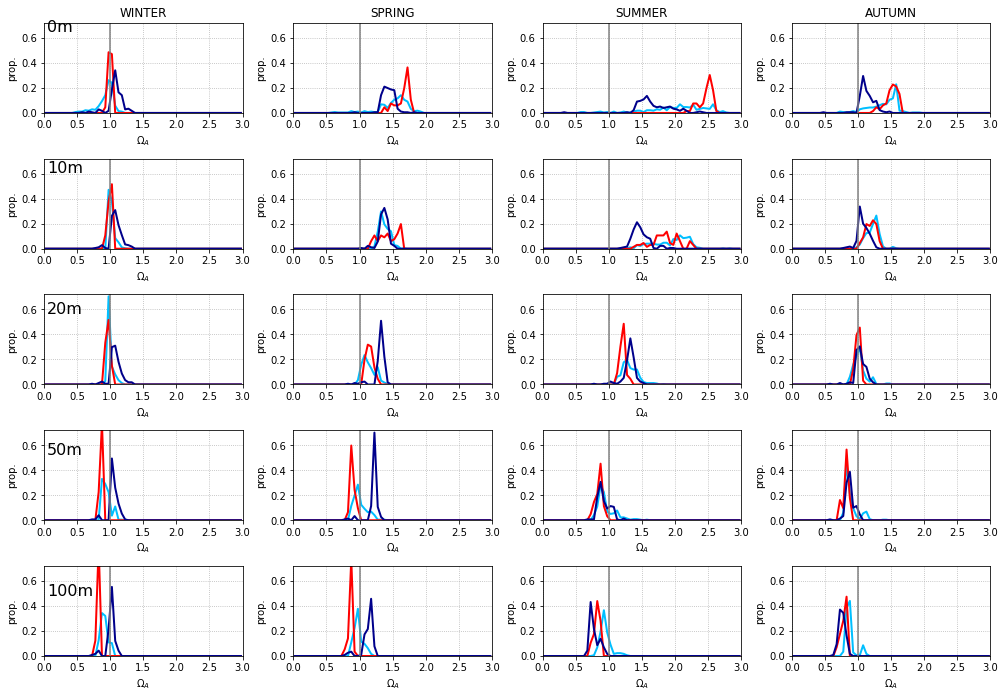

In [7]:
fact = 0.7
fig, axs = plt.subplots(5,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plot_hists(OmA_2017_FY_D_0,[0,1,2,3])
plot_hists(OmA_2017_FY_D_10,[4,5,6,7])
plot_hists(OmA_2017_FY_D_18,[8,9,10,11])
plot_hists(OmA_2017_FY_D_24,[12,13,14,15])
plot_hists(OmA_2017_FY_D_26,[16,17,18,19])


axs[0]
for i in range(0,20):
    axs[i].set_xlim([0,3])
    axs[i].set_ylim([0,0.72])
    axs[i].set_ylabel('prop.')
    axs[i].set_xlabel('$\Omega_A$')
    axs[i].grid(linestyle = ':')
    axs[i].axvline(x=1,color = 'grey')
    
axs[0].set_title('WINTER')
axs[1].set_title('SPRING')
axs[2].set_title('SUMMER')
axs[3].set_title('AUTUMN')

fs = 16
fig.text(0.05,0.15,'100m', fontsize = fs)
fig.text(0.05,0.35,'50m', fontsize = fs)
fig.text(0.05,0.55,'20m', fontsize = fs)
fig.text(0.05,0.75,'10m', fontsize = fs)
fig.text(0.05,0.95,'0m', fontsize = fs)
plt.tight_layout()


## time spent exposed to waters under a certain threshold

In [8]:
#spring, csog
csog_0 = (OmA_2017_FY_D_0[:,ys_csog,xs_csog])
nostn_csog = np.shape(csog_0)[1]

csog_10 = (OmA_2017_FY_D_10[:,ys_csog,xs_csog])
csog_18 = (OmA_2017_FY_D_18[:,ys_csog,xs_csog])
csog_24 = (OmA_2017_FY_D_24[:,ys_csog,xs_csog])
csog_26 = (OmA_2017_FY_D_26[:,ys_csog,xs_csog])


thres_vibes = [0.5,0.7,1,1.3,1.5,2]

expo_csog_0 = np.zeros([nostn_csog,6])
expo_csog_10 = np.zeros([nostn_csog,6])
expo_csog_18 = np.zeros([nostn_csog,6])
expo_csog_24 = np.zeros([nostn_csog,6])
expo_csog_26 = np.zeros([nostn_csog,6])

for i in range(0,(nostn_csog)):
    
    tcsog_0 = csog_0[:,i]
    tcsog_10 = csog_10[:,i]
    tcsog_18 = csog_18[:,i]
    tcsog_24 = csog_24[:,i]
    tcsog_26 = csog_26[:,i]

    for t in range(0,6):
        thres = thres_vibes[t]
        
        if np.sum(tcsog_0) > 1e10:
            expo_csog_0[i,t] = np.nan
        else:
            expo_csog_0[i,t] = np.size(tcsog_0[tcsog_0<=thres])/365
            
        if np.sum(tcsog_10) > 1e10:
            expo_csog_10[i,t] = np.nan
        else:
            expo_csog_10[i,t] = np.size(tcsog_10[tcsog_10<=thres])/365
            
        if np.sum(tcsog_18) > 1e10:
            expo_csog_18[i,t] = np.nan
        else:
            expo_csog_18[i,t] = np.size(tcsog_18[tcsog_18<=thres])/365
            
        if np.sum(tcsog_24) > 1e10:
            expo_csog_24[i,t] = np.nan
        else:
            expo_csog_24[i,t] = np.size(tcsog_24[tcsog_24<=thres])/365
            
        if np.sum(tcsog_26) > 1e10:
            expo_csog_26[i,t] = np.nan
        else:
            expo_csog_26[i,t] = np.size(tcsog_26[tcsog_26<=thres])/365
    
    
    
print(np.shape(expo_csog_0))

thres_means_csog = np.zeros([5,6])
thres_stds_csog = np.zeros([5,6])

for i in range(0,6):
    thres_means_csog[0,i] = np.nanmean(expo_csog_0[:,i])
    thres_means_csog[1,i] = np.nanmean(expo_csog_10[:,i])
    thres_means_csog[2,i] = np.nanmean(expo_csog_18[:,i])
    thres_means_csog[3,i] = np.nanmean(expo_csog_24[:,i])
    thres_means_csog[4,i] = np.nanmean(expo_csog_26[:,i])
    
    thres_stds_csog[0,i] = np.nanstd(expo_csog_0[:,i])
    thres_stds_csog[1,i] = np.nanstd(expo_csog_10[:,i])
    thres_stds_csog[2,i] = np.nanstd(expo_csog_18[:,i])
    thres_stds_csog[3,i] = np.nanstd(expo_csog_24[:,i])
    thres_stds_csog[4,i] = np.nanstd(expo_csog_26[:,i])

(275, 6)


In [9]:
#spring, nsog
nsog_0 = (OmA_2017_FY_D_0[:,ys_nsog,xs_nsog])
nostn_nsog = np.shape(nsog_0)[1]

nsog_10 = (OmA_2017_FY_D_10[:,ys_nsog,xs_nsog])
nsog_18 = (OmA_2017_FY_D_18[:,ys_nsog,xs_nsog])
nsog_24 = (OmA_2017_FY_D_24[:,ys_nsog,xs_nsog])
nsog_26 = (OmA_2017_FY_D_26[:,ys_nsog,xs_nsog])


thres_vibes = [0.5,0.7,1,1.3,1.5,2]

expo_nsog_0 = np.zeros([nostn_nsog,6])
expo_nsog_10 = np.zeros([nostn_nsog,6])
expo_nsog_18 = np.zeros([nostn_nsog,6])
expo_nsog_24 = np.zeros([nostn_nsog,6])
expo_nsog_26 = np.zeros([nostn_nsog,6])

for i in range(0,(nostn_nsog)):
    
    tnsog_0 = nsog_0[:,i]
    tnsog_10 = nsog_10[:,i]
    tnsog_18 = nsog_18[:,i]
    tnsog_24 = nsog_24[:,i]
    tnsog_26 = nsog_26[:,i]

    for t in range(0,6):
        thres = thres_vibes[t]
        
        if np.sum(tnsog_0) > 1e10:
            expo_nsog_0[i,t] = np.nan
        else:
            expo_nsog_0[i,t] = np.size(tnsog_0[tnsog_0<=thres])/365
            
        if np.sum(tnsog_10) > 1e10:
            expo_nsog_10[i,t] = np.nan
        else:
            expo_nsog_10[i,t] = np.size(tnsog_10[tnsog_10<=thres])/365
            
        if np.sum(tnsog_18) > 1e10:
            expo_nsog_18[i,t] = np.nan
        else:
            expo_nsog_18[i,t] = np.size(tnsog_18[tnsog_18<=thres])/365
            
        if np.sum(tnsog_24) > 1e10:
            expo_nsog_24[i,t] = np.nan
        else:
            expo_nsog_24[i,t] = np.size(tnsog_24[tnsog_24<=thres])/365
            
        if np.sum(tnsog_26) > 1e10:
            expo_nsog_26[i,t] = np.nan
        else:
            expo_nsog_26[i,t] = np.size(tnsog_26[tnsog_26<=thres])/365
    
    
    
print(np.shape(expo_nsog_0))

thres_means_nsog = np.zeros([5,6])
thres_stds_nsog = np.zeros([5,6])

for i in range(0,6):
    thres_means_nsog[0,i] = np.nanmean(expo_nsog_0[:,i])
    thres_means_nsog[1,i] = np.nanmean(expo_nsog_10[:,i])
    thres_means_nsog[2,i] = np.nanmean(expo_nsog_18[:,i])
    thres_means_nsog[3,i] = np.nanmean(expo_nsog_24[:,i])
    thres_means_nsog[4,i] = np.nanmean(expo_nsog_26[:,i])
    
    thres_stds_nsog[0,i] = np.nanstd(expo_nsog_0[:,i])
    thres_stds_nsog[1,i] = np.nanstd(expo_nsog_10[:,i])
    thres_stds_nsog[2,i] = np.nanstd(expo_nsog_18[:,i])
    thres_stds_nsog[3,i] = np.nanstd(expo_nsog_24[:,i])
    thres_stds_nsog[4,i] = np.nanstd(expo_nsog_26[:,i])

(66, 6)


In [10]:
#spring, jdf
jdf_0 = (OmA_2017_FY_D_0[:,ys_jdf,xs_jdf])
nostn_jdf = np.shape(jdf_0)[1]

jdf_10 = (OmA_2017_FY_D_10[:,ys_jdf,xs_jdf])
jdf_18 = (OmA_2017_FY_D_18[:,ys_jdf,xs_jdf])
jdf_24 = (OmA_2017_FY_D_24[:,ys_jdf,xs_jdf])
jdf_26 = (OmA_2017_FY_D_26[:,ys_jdf,xs_jdf])


thres_vibes = [0.5,0.7,1,1.3,1.5,2]

expo_jdf_0 = np.zeros([nostn_jdf,6])
expo_jdf_10 = np.zeros([nostn_jdf,6])
expo_jdf_18 = np.zeros([nostn_jdf,6])
expo_jdf_24 = np.zeros([nostn_jdf,6])
expo_jdf_26 = np.zeros([nostn_jdf,6])

for i in range(0,(nostn_jdf)):
    
    tjdf_0 = jdf_0[:,i]
    tjdf_10 = jdf_10[:,i]
    tjdf_18 = jdf_18[:,i]
    tjdf_24 = jdf_24[:,i]
    tjdf_26 = jdf_26[:,i]

    for t in range(0,6):
        thres = thres_vibes[t]
        
        if np.sum(tjdf_0) > 1e10:
            expo_jdf_0[i,t] = np.nan
        else:
            expo_jdf_0[i,t] = np.size(tjdf_0[tjdf_0<=thres])/365
            
        if np.sum(tjdf_10) > 1e10:
            expo_jdf_10[i,t] = np.nan
        else:
            expo_jdf_10[i,t] = np.size(tjdf_10[tjdf_10<=thres])/365
            
        if np.sum(tjdf_18) > 1e10:
            expo_jdf_18[i,t] = np.nan
        else:
            expo_jdf_18[i,t] = np.size(tjdf_18[tjdf_18<=thres])/365
            
        if np.sum(tjdf_24) > 1e10:
            expo_jdf_24[i,t] = np.nan
        else:
            expo_jdf_24[i,t] = np.size(tjdf_24[tjdf_24<=thres])/365
            
        if np.sum(tjdf_26) > 1e10:
            expo_jdf_26[i,t] = np.nan
        else:
            expo_jdf_26[i,t] = np.size(tjdf_26[tjdf_26<=thres])/365
    
    
    
print(np.shape(expo_jdf_0))

thres_means_jdf = np.zeros([5,6])
thres_stds_jdf = np.zeros([5,6])

for i in range(0,6):
    thres_means_jdf[0,i] = np.nanmean(expo_jdf_0[:,i])
    thres_means_jdf[1,i] = np.nanmean(expo_jdf_10[:,i])
    thres_means_jdf[2,i] = np.nanmean(expo_jdf_18[:,i])
    thres_means_jdf[3,i] = np.nanmean(expo_jdf_24[:,i])
    thres_means_jdf[4,i] = np.nanmean(expo_jdf_26[:,i])
    
    thres_stds_jdf[0,i] = np.nanstd(expo_jdf_0[:,i])
    thres_stds_jdf[1,i] = np.nanstd(expo_jdf_10[:,i])
    thres_stds_jdf[2,i] = np.nanstd(expo_jdf_18[:,i])
    thres_stds_jdf[3,i] = np.nanstd(expo_jdf_24[:,i])
    thres_stds_jdf[4,i] = np.nanstd(expo_jdf_26[:,i])

(176, 6)


Text(0.5, 1.05, 'Time spent below different omega thresholds (year 2017, cluster stations)')

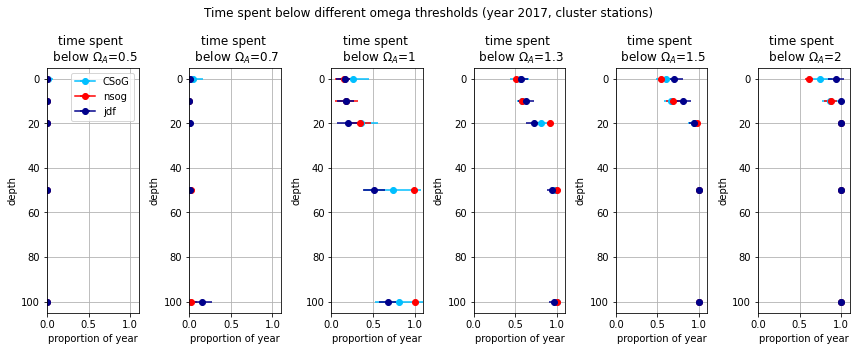

In [39]:
def plot_time_under_thres(i):
    axs[i].errorbar(thres_means_csog[0,i], xerr =  thres_stds_csog[0,i], y= 0, \
             marker = 'o', color = 'deepskyblue', label = 'CSoG')
    axs[i].errorbar(thres_means_csog[1,i], xerr =  thres_stds_csog[1,i], y= 10, \
                 marker = 'o', color = 'deepskyblue')
    axs[i].errorbar(thres_means_csog[2,i], xerr =  thres_stds_csog[2,i], y= 20, \
                 marker = 'o', color = 'deepskyblue')
    axs[i].errorbar(thres_means_csog[3,i], xerr =  thres_stds_csog[3,i], y= 50, \
                 marker = 'o', color = 'deepskyblue')
    axs[i].errorbar(thres_means_csog[4,i], xerr =  thres_stds_csog[4,i], y= 100, \
                 marker = 'o', color = 'deepskyblue')

    axs[i].errorbar(thres_means_nsog[0,i], xerr =  thres_stds_nsog[0,i], y= 0, \
                 marker = 'o', color = 'red', label = 'nsog')
    axs[i].errorbar(thres_means_nsog[1,i], xerr =  thres_stds_nsog[1,i], y= 10, \
                 marker = 'o', color = 'red')
    axs[i].errorbar(thres_means_nsog[2,i], xerr =  thres_stds_nsog[2,i], y= 20, \
                 marker = 'o', color = 'red')
    axs[i].errorbar(thres_means_nsog[3,i], xerr =  thres_stds_nsog[3,i], y= 50, \
                 marker = 'o', color = 'red')
    axs[i].errorbar(thres_means_nsog[4,i], xerr =  thres_stds_nsog[4,i], y= 100, \
                 marker = 'o', color = 'red')

    axs[i].errorbar(thres_means_jdf[0,i], xerr =  thres_stds_jdf[0,i], y= 0, \
                 marker = 'o', color = 'darkblue', label = 'jdf')
    axs[i].errorbar(thres_means_jdf[1,i], xerr =  thres_stds_jdf[1,i], y= 10, \
                 marker = 'o', color = 'darkblue')
    axs[i].errorbar(thres_means_jdf[2,i], xerr =  thres_stds_jdf[2,i], y= 20, \
                 marker = 'o', color = 'darkblue')
    axs[i].errorbar(thres_means_jdf[3,i], xerr =  thres_stds_jdf[3,i], y= 50, \
                 marker = 'o', color = 'darkblue')
    axs[i].errorbar(thres_means_jdf[4,i], xerr =  thres_stds_jdf[4,i], y= 100, \
                 marker = 'o', color = 'darkblue')

fact = 1
fig, axs = plt.subplots(1,6, figsize=(12*fact, 4.6*fact), facecolor='w', edgecolor='k')


plot_time_under_thres(0)
plot_time_under_thres(1)
plot_time_under_thres(2)
plot_time_under_thres(3)
plot_time_under_thres(4)
plot_time_under_thres(5)

for i in range(0,6):
    axs[i].invert_yaxis()
    axs[i].grid()
    axs[i].set_ylabel('depth')
    axs[i].set_xlabel('proportion of year')
    axs[i].set_xlim([0,1.1])
    axs[i].set_title(f'time spent \n below $\Omega_A$={thres_vibes[i]}')
    
axs[0].legend()
plt.tight_layout()

plt.suptitle('Time spent below different omega thresholds (year 2017, cluster stations)', y = 1.05)
#plt.gca().invert_yaxis()
# axs.plot(thres_means_csog[1,2],10, marker = 'o', color = 'deepskyblue')
# axs.plot(thres_means_csog[2,2],20, marker = 'o', color = 'deepskyblue')
# axs.plot(thres_means_csog[3,2],50, marker = 'o', color = 'deepskyblue')
# axs.plot(thres_means_csog[4,2],100, marker = 'o', color = 'deepskyblue')

# axs.plot(thres_means_nsog[0,2],0, marker = 'o', color = 'red')
# axs.plot(thres_means_nsog[1,2],10, marker = 'o', color = 'red')
# axs.plot(thres_means_nsog[2,2],20, marker = 'o', color = 'red')
# axs.plot(thres_means_nsog[3,2],50, marker = 'o', color = 'red')
# axs.plot(thres_means_nsog[4,2],100, marker = 'o', color = 'red')

# axs.plot(thres_means_jdf[0,2],0, marker = 'o', color = 'darkblue')
# axs.plot(thres_means_jdf[1,2],10, marker = 'o', color = 'darkblue')
# axs.plot(thres_means_jdf[2,2],20, marker = 'o', color = 'darkblue')
# axs.plot(thres_means_jdf[3,2],50, marker = 'o', color = 'darkblue')
# axs.plot(thres_means_jdf[4,2],100, marker = 'o', color = 'darkblue')



In [12]:


def calc_depth_avgs_no_loop(flist):
    with nc.Dataset(flist) as ds:
        print(ds)
#         diatoms = ds.variables['diatoms'][:,:,j0:j1,i0:i1]
#         diatoms_int = (diatoms * tmask * e3t0).sum(axis=1).mean(axis=0)
#         uZ = ds.variables['microzooplankton'][:,:,j0:j1,i0:i1]
#         uZ_int = (uZ * tmask * e3t0).sum(axis=1).mean(axis=0)
    return ds


calc_depth_avgs_no_loop(strlist)

NameError: name 'strlist' is not defined